In [19]:
import pandas as pd
import os
%matplotlib inline

PARQA = os.getenv('PARQA')

In [15]:

def getAllFiles(path, frmt=None, full=False):
    '''return all files in the folder,
    filtered by format, if it was provided'''

    fs = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        if frmt!=None:
            fsTmp = [dirpath + '/' + fl for fl in filenames if fl.endswith(frmt)]
            fs.extend(fsTmp)
        else:
            fsTmp = filenames
            fs.extend(fsTmp)
    if full:
        return [path+f for f in fs]
    else:
        return fs

path = PARQA + 'data/PIP_TIMESERIES/11-01-2015'
scores = [x for x in getAllFiles(path,'.csv', False) if 'SpatialAggregated' in x]


In [16]:
df = pd.DataFrame({score.split('/')[-4]:pd.read_csv(score, index_col='District')['Amenities & Area Normalized Score'] for score in scores})
df.head(4)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
District,,,,,,,,,,,,
01,0.880417,0.887521,0.867163,0.858168,0.877541,0.863873,0.854830,0.864376,0.856773,0.878360,0.872413,0.836734
02,0.884404,0.907578,0.886692,0.852164,0.878847,0.869945,0.860610,0.850868,0.904405,0.907914,0.892291,0.897234
03,0.792827,0.840322,0.863574,0.871458,0.899940,0.818947,0.840048,0.843014,0.825391,0.856095,0.848748,0.845732
04,0.826591,0.834475,0.826443,0.835784,0.883226,0.823016,0.846050,0.787835,0.831526,0.827879,0.836084,0.839215


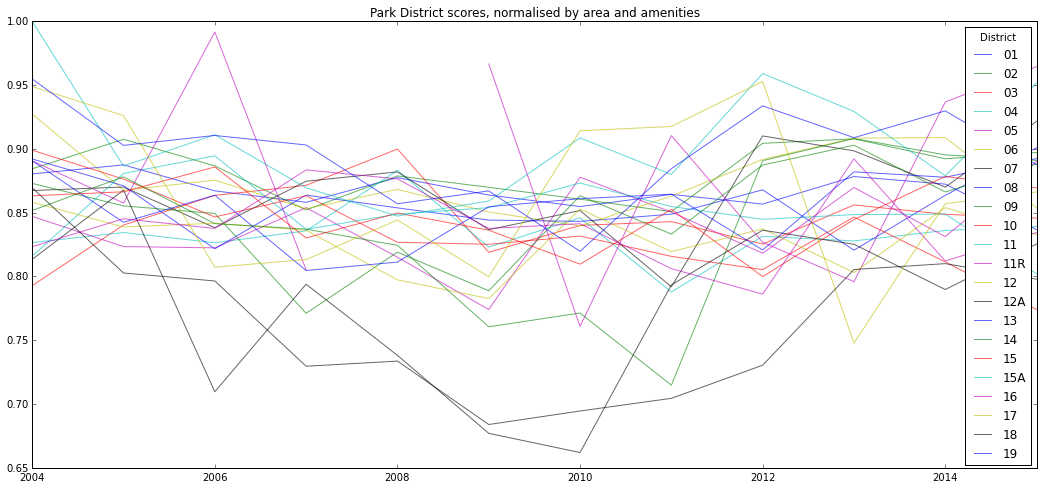

In [26]:
df.transpose().plot(kind='line', 
                    figsize=(18,8), 
                    alpha=.6, 
                    title='Park District scores, normalised by area and amenities');


In [17]:
df.to_csv(PARQA + 'data/PIP_Districts_timeseries.csv')